This notebook is based on the [article](https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/) about different types of Image Segmentation Techniques. 

In [1]:
from skimage.color import rgb2gray
from scipy import ndimage
import numpy as np
import cv2
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

__Region-based Segmentation__

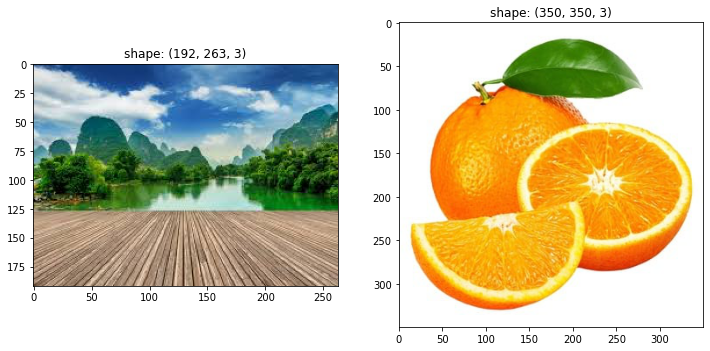

In [2]:
img1 = plt.imread('data/Image Segmentation Techniques samples/1.jpeg')
img2 = plt.imread('data/Image Segmentation Techniques samples/2.jpg')

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[0].set_title(f'shape: {img1.shape}')
ax[1].set_title(f'shape: {img2.shape}');

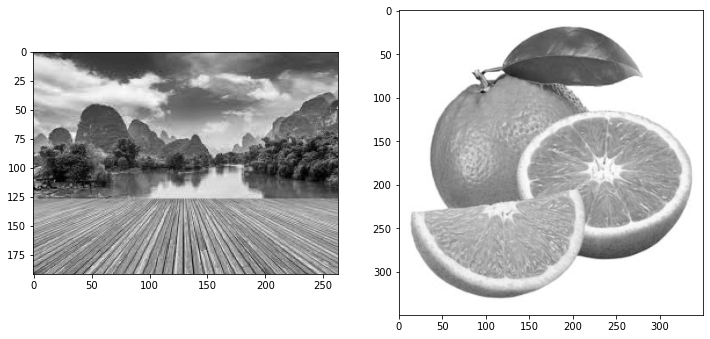

In [3]:
gray1 = rgb2gray(img1)
gray2 = rgb2gray(img2)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(gray1, cmap='gray')
ax[1].imshow(gray2, cmap='gray');

In [4]:
def global_threshold(img):
    reshaped_img = img.reshape(img.shape[0]*img.shape[1])
    
    for i in range(reshaped_img.shape[0]):
        if reshaped_img[i] > reshaped_img.mean():
            reshaped_img[i] = 1
        else:
            reshaped_img[i] = 0
    return reshaped_img.reshape(img.shape[0], img.shape[1])

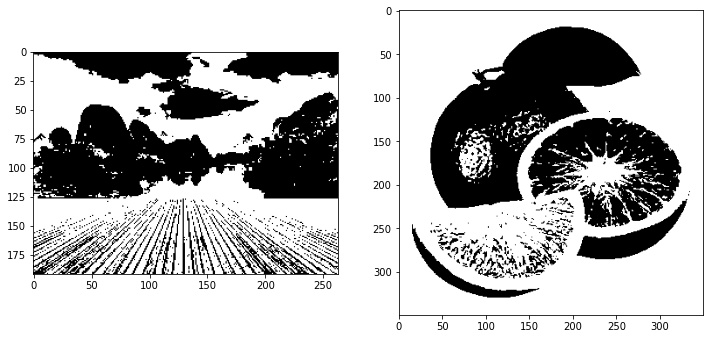

In [5]:
gt_img1 = global_threshold(gray1)
gt_img2 = global_threshold(gray2)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(gt_img1, cmap='gray')
ax[1].imshow(gt_img2, cmap='gray');

In [6]:
def local_threshold(img):
    reshaped_img = img.reshape(img.shape[0]*img.shape[1])

    for i in range(reshaped_img.shape[0]):
        if reshaped_img[i] > reshaped_img.mean():
            reshaped_img[i] = 3
        elif reshaped_img[i] > reshaped_img.mean()/2:
            reshaped_img[i] = 2
        elif reshaped_img[i] > reshaped_img.mean()/4:
            reshaped_img[i] = 1
        else:
            reshaped_img[i] = 0
    return reshaped_img.reshape(img.shape[0], img.shape[1])

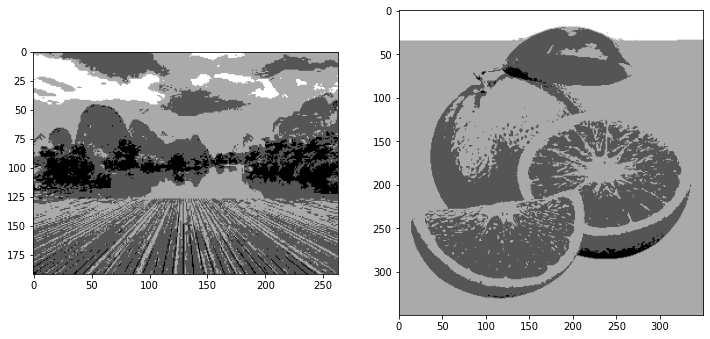

In [7]:
gray1 = rgb2gray(img1)
gray2 = rgb2gray(img2)
lt_img1 = local_threshold(gray1)
lt_img2 = local_threshold(gray2)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(lt_img1, cmap='gray')
ax[1].imshow(lt_img2, cmap='gray');

__Edge Detection Segmentation__

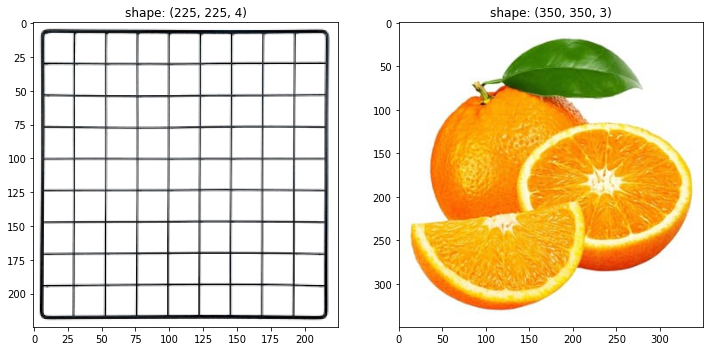

In [8]:
img3 = plt.imread('data/Image Segmentation Techniques samples/3.png')

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img3)
ax[1].imshow(img2)
ax[0].set_title(f'shape: {img3.shape}')
ax[1].set_title(f'shape: {img2.shape}');

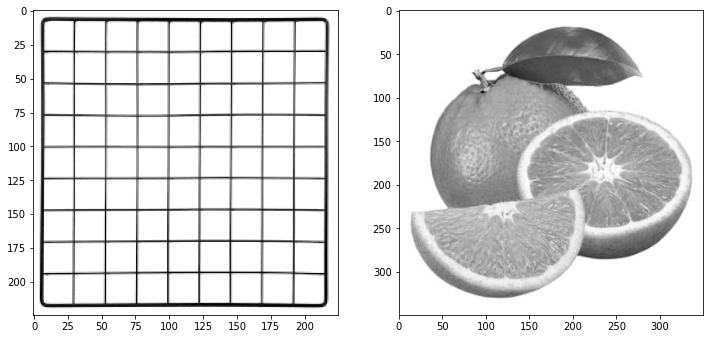

In [9]:
gray2 = rgb2gray(img2)
gray3 = rgb2gray(img3[..., :3])

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(gray3, cmap='gray')
ax[1].imshow(gray2, cmap='gray');

In [10]:
# define the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])

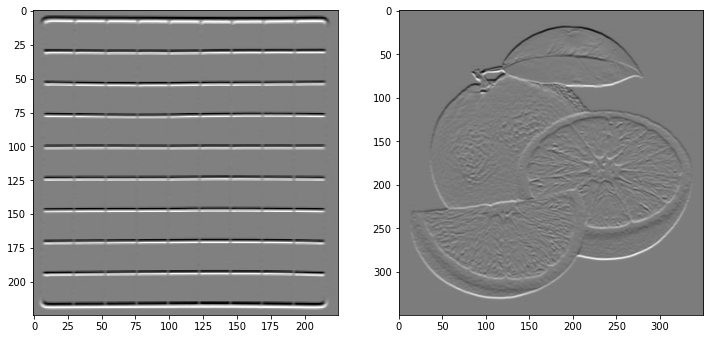

In [11]:
out3_h = ndimage.convolve(gray3, sobel_horizontal, mode='reflect')
out2_h = ndimage.convolve(gray2, sobel_horizontal, mode='reflect')

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(out3_h, cmap='gray')
ax[1].imshow(out2_h, cmap='gray');

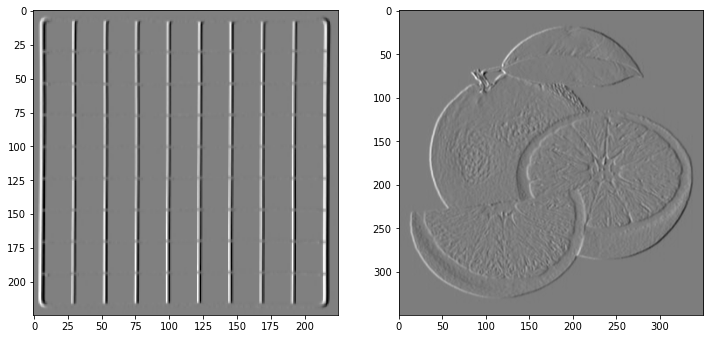

In [12]:
out3_v = ndimage.convolve(gray3, sobel_vertical, mode='reflect')
out2_v = ndimage.convolve(gray2, sobel_vertical, mode='reflect')

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(out3_v, cmap='gray')
ax[1].imshow(out2_v, cmap='gray');

In [13]:
# define the laplace kernel
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

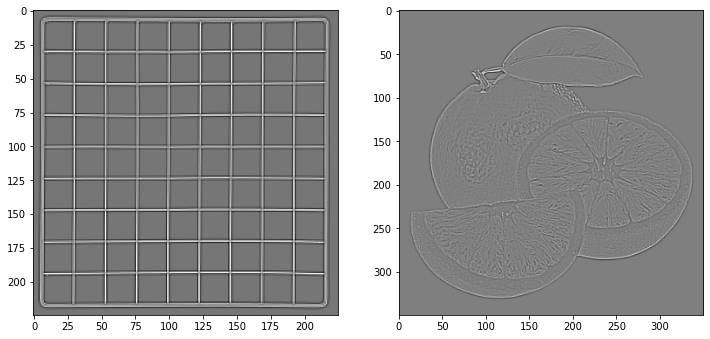

In [14]:
out3_l = ndimage.convolve(gray3, kernel_laplace, mode='reflect')
out2_l = ndimage.convolve(gray2, kernel_laplace, mode='reflect')

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(out3_l, cmap='gray')
ax[1].imshow(out2_l, cmap='gray');

__Image Segmentation based on Clustering__

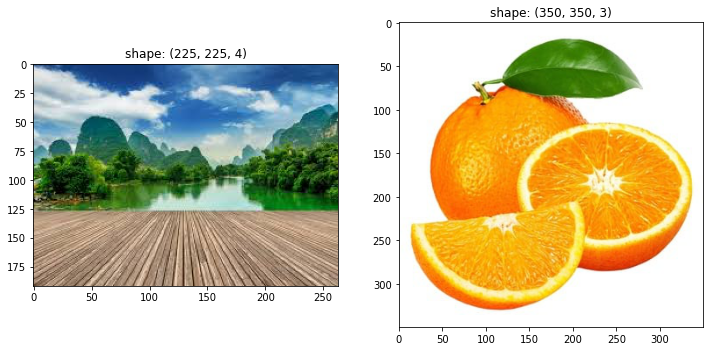

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[0].set_title(f'shape: {img3.shape}')
ax[1].set_title(f'shape: {img2.shape}');

In [16]:
img1_r = img1.reshape(img1.shape[0]*img1.shape[1], img1.shape[2])
img2_r = img2.reshape(img2.shape[0]*img2.shape[1], img2.shape[2])
print('Shape of img1:', img1_r.shape)
print('Shape of img2:', img2_r.shape)

Shape of img1: (50496, 3)
Shape of img2: (122500, 3)


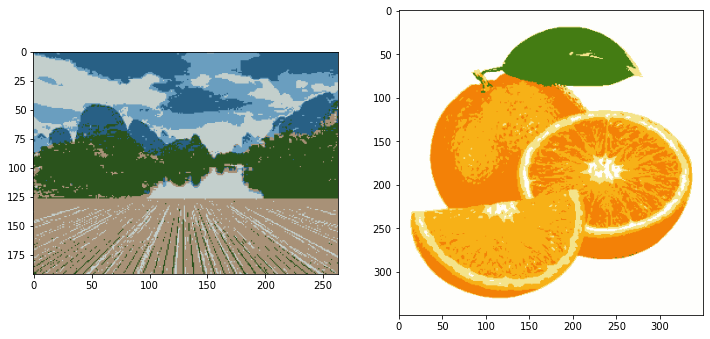

In [17]:
img1_kmeans = KMeans(n_clusters=5, random_state=0).fit(img1_r)
img2_kmeans = KMeans(n_clusters=5, random_state=0).fit(img2_r)

img1_show = img1_kmeans.cluster_centers_[img1_kmeans.labels_].reshape(img1.shape[0], img1.shape[1], img1.shape[2])
img2_show = img2_kmeans.cluster_centers_[img2_kmeans.labels_].reshape(img2.shape[0], img2.shape[1], img2.shape[2])
img1_show = np.asarray(img1_show, dtype=np.uint8)
img2_show = np.asarray(img2_show, dtype=np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img1_show)
ax[1].imshow(img2_show);